## An Overfitting Example: Polynomial Curve Fitting

Degree= 1 , coefficients= [-1.33824532]
Degree= 3 , coefficients= [ 0.05678044 -4.73302143  3.57119659]
Degree= 9 , coefficients= [ 1.78404416 -4.31162662 -2.30102588 -0.06409429  1.21135449  1.58764961
  1.31856931  0.63425728 -0.29282231]


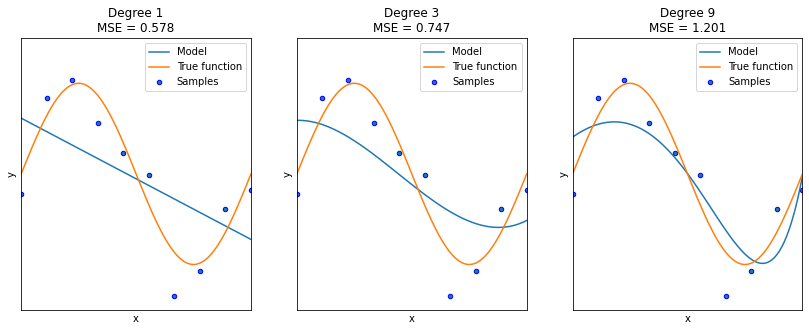

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(2 * np.pi * X)

np.random.seed(123)

n_samples = 10
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2 # sample 데이터 10개 를 만듬 

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    from sklearn.linear_model import Ridge
    linear_regression = Ridge(alpha=0.01) # alpha 는 규제항의 람다 결국 정답을 모르니 알파값을 계속 바꾸며 반복 실험 할 수 밖에 없다. 
#    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

Degree= 1 , coefficients= [-1.35138446]
Degree= 3 , coefficients= [ 11.1331822  -32.95076452  21.98623377]
Degree= 9 , coefficients= [ 1.05037522e+02 -2.26180928e+03  2.13602586e+04 -1.07407073e+05
  3.12668028e+05 -5.43220993e+05  5.54458361e+05 -3.06230591e+05
  7.05288240e+04]


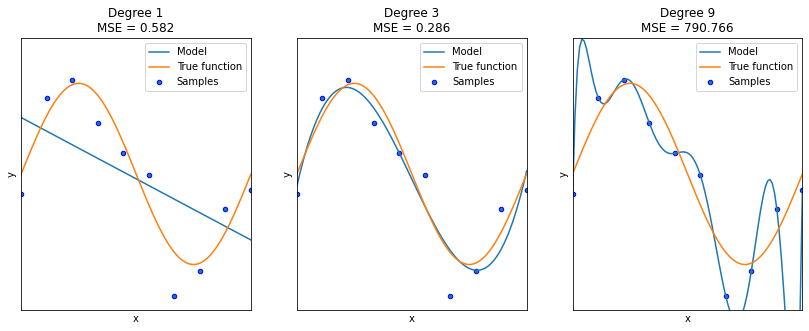

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(2 * np.pi * X)

np.random.seed(123)

n_samples = 10
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    #from sklearn.linear_model import Ridge
    #linear_regression = Ridge(alpha=0.01) # alpha 는 규제항의 람다
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

## End